## Observations and Insights 

In [2]:
%matplotlib notebook

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
# unique_mice = merged_df['Mouse ID'].nunique()
total_mice = merged_df['Mouse ID'].count()
mice_numbers_df = pd.DataFrame({"Total Mice" :[total_mice]})
mice_numbers_df

,Total Mice
0,1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data_df['Mouse ID'].count()
mice_numbers_df = pd.DataFrame({"Total Mice" :[clean_mice]})
mice_numbers_df

,Total Mice
0,1888


## Summary Statistics

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_data = clean_data_df.groupby('Drug Regimen')
drug_labels = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo', 'Propriva','Ramicane', 'Stelasyn', 'Zoniferol']

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = regimen_data["Tumor Volume (mm3)"].mean()
median = regimen_data["Tumor Volume (mm3)"].median()
variance = regimen_data["Tumor Volume (mm3)"].var()
deviation = regimen_data["Tumor Volume (mm3)"].std()
SEM = regimen_data["Tumor Volume (mm3)"].sem()

# print(mean)
# print(median)
# print(variance)
# print(deviation)
# print(SEM)


# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean" : mean,
                               "Median" : median,
                               "Variance" : variance,
                               "Standard Deviation": deviation,
                               "SEM" : SEM})

summary_stats_df.style.format({"Mean": "{:,.2f}",
                              "Median": "{:,.2f}",
                              "Variance" : "{:,.2f}",
                              "Standard Deviation" : "{:,.2f}",
                               "SEM": "{:,.2f}"})


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<IPython.core.display.Javascript object>


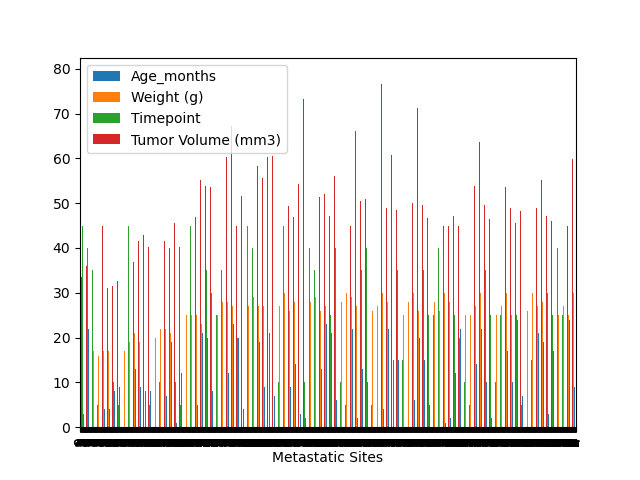

<AxesSubplot:xlabel='Metastatic Sites'>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_data_df.plot.bar(x=7)
# Add chart labels

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Add chart labels


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Add chart labels


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Add chart labels


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
